In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_bm(T, dt):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m)
    randomness[0] = 0
    return randomness.cumsum()

# The CIR Model

## a)

In [3]:
def CIR(T, dt, a, Z_0):
    randomness = generate_bm(T, dt)
    time_points = np.arange(0, T + dt, dt)
    res = [0 for _ in range(len(randomness))]
    res[0] = Z_0
    for i in range(len(randomness) - 1):
        if res[i] <= 0:
            res[i + 1] == 0
            continue
        dB = randomness[i + 1] - randomness[i]
        dT = time_points[i + 1] - time_points[i]
        res[i + 1] = max(0, res[i] + np.sqrt(res[i]) * dB + (a - res[i]) * dT)
    return res

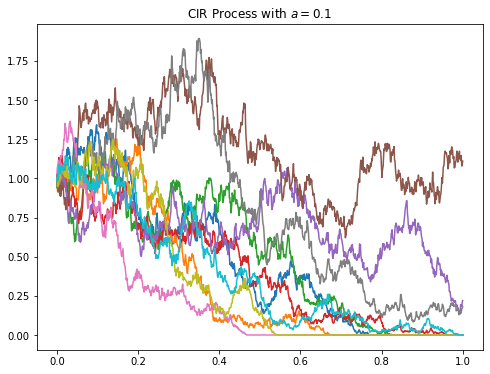

In [4]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
for _ in range(10):
    plt.plot(time_points, CIR(1, 0.001, 0.1, 1))
plt.title("CIR Process with $a=0.1$")
plt.show()

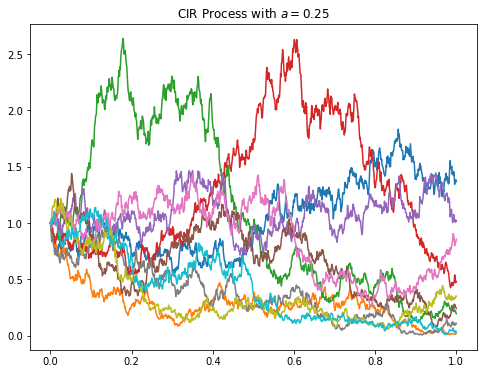

In [5]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
for _ in range(10):
    plt.plot(time_points, CIR(1, 0.001, 0.25, 1))
plt.title("CIR Process with $a=0.25$")
plt.show()

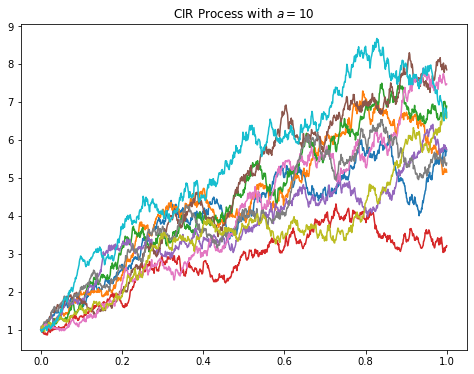

In [6]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
for _ in range(10):
    plt.plot(time_points, CIR(1, 0.001, 10, 1))
plt.title("CIR Process with $a=10$")
plt.show()

## 1000 Paths sampling

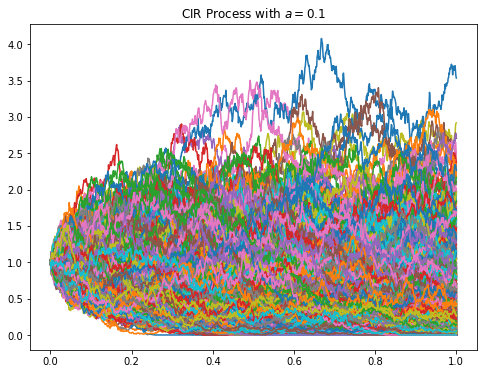

Proportion of hitting zero paths: 0.2250


In [7]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
cnt = 0
for _ in range(1000):
    path = CIR(1, 0.001, 0.1, 1)
    if path[-1] == 0:
        cnt += 1
    plt.plot(time_points, path)
plt.title("CIR Process with $a=0.1$")
plt.show()
print("Proportion of hitting zero paths: {:.4f}".format(cnt / 1000))

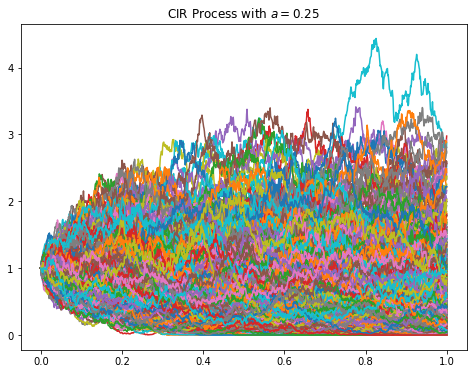

Proportion of hitting zero paths: 0.1300


In [8]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
cnt = 0
for _ in range(1000):
    path = CIR(1, 0.001, 0.25, 1)
    if path[-1] == 0:
        cnt += 1
    plt.plot(time_points, path)
plt.title("CIR Process with $a=0.25$")
plt.show()
print("Proportion of hitting zero paths: {:.4f}".format(cnt / 1000))

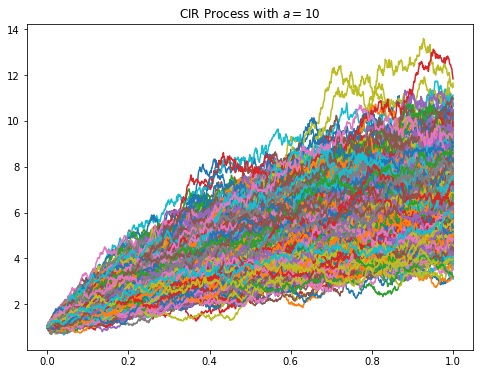

Proportion of hitting zero paths: 0.0000


In [9]:
time_points = np.arange(0, 1.001, 0.001)
plt.figure(figsize=(8, 6))
cnt = 0
for _ in range(1000):
    path = CIR(1, 0.001, 10, 1)
    if path[-1] == 0:
        cnt += 1
    plt.plot(time_points, path)
plt.title("CIR Process with $a=10$")
plt.show()
print("Proportion of hitting zero paths: {:.4f}".format(cnt / 1000))

## The case when a=10

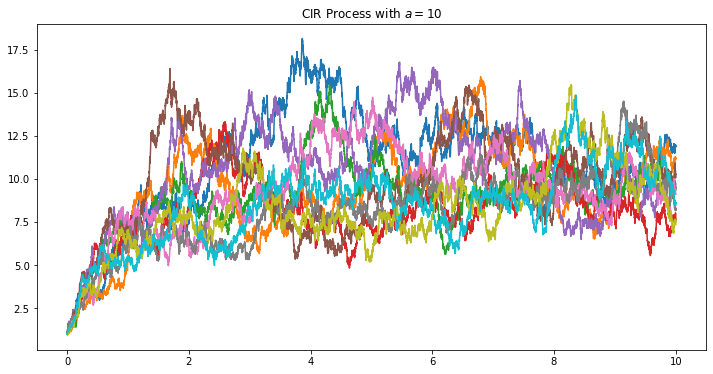

In [10]:
time_points = np.arange(0, 10.001, 0.001)
plt.figure(figsize=(12, 6))
for _ in range(10):
    path = CIR(10, 0.001, 10, 1)
    plt.plot(time_points, path)
plt.title("CIR Process with $a=10$")
plt.show()

The paths do not touch 0 in this case!

## The average of the final position

In [11]:
values = 0
for _ in range(100):
    path = CIR(10, 0.001, 10, 1)
    values += path[-1]
print("The average final position is {:.4f}".format(values / 100))

The average final position is 10.5751


The average final position is around 10, equaling the $a$ term set in the SDE.

# Bessel Processes

In [12]:
def Bessel(T, dt, d, R_0):
    randomness = generate_bm(T, dt)
    time_points = np.arange(0, T + dt, dt)
    res = [0 for _ in range(len(randomness))]
    res[0] = R_0
    for i in range(len(randomness) - 1):
        dB = randomness[i + 1] - randomness[i]
        dT = time_points[i + 1] - time_points[i]
        res[i + 1] = dB + (d - 1) / (2 * res[i]) * dT + res[i]
        if res[i + 1] <= 0:
            return []
    return res

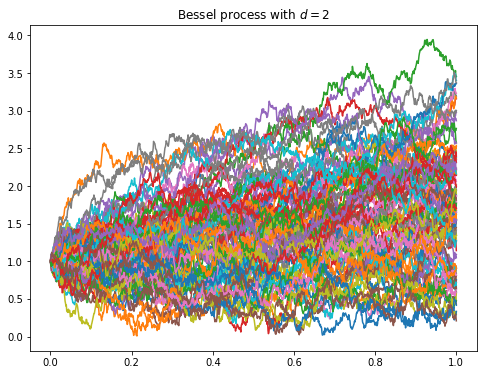

Proportion of paths touching negative: 0.04


In [13]:
cnt = 0
plt.figure(figsize=(8, 6))
time_points = np.arange(0, 1.001, 0.001)
for _ in range(100):
    path = Bessel(1, 0.001, 2, 1)
    if path:
        plt.plot(time_points, path)
    else:
        cnt += 1
plt.title("Bessel process with $d=2$")
plt.show()
print("Proportion of paths touching negative: {:.2f}".format(cnt / 100))

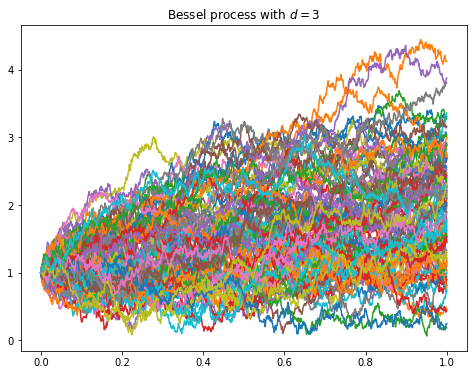

Proportion of paths touching negative: 0.00


In [14]:
cnt = 0
plt.figure(figsize=(8, 6))
time_points = np.arange(0, 1.001, 0.001)
for _ in range(100):
    path = Bessel(1, 0.001, 3, 1)
    if path:
        plt.plot(time_points, path)
    else:
        cnt += 1
plt.title("Bessel process with $d=3$")
plt.show()
print("Proportion of paths touching negative: {:.2f}".format(cnt / 100))

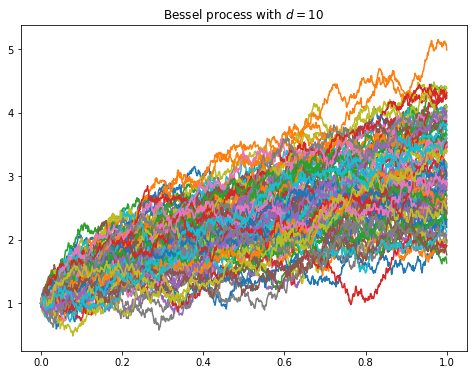

Proportion of paths touching negative: 0.00


In [15]:
cnt = 0
plt.figure(figsize=(8, 6))
time_points = np.arange(0, 1.001, 0.001)
for _ in range(100):
    path = Bessel(1, 0.001, 10, 1)
    if path:
        plt.plot(time_points, path)
    else:
        cnt += 1
plt.title("Bessel process with $d=10$")
plt.show()
print("Proportion of paths touching negative: {:.2f}".format(cnt / 100))

It seems that there are not many paths hitting negative if we set $d=2,3,10$.

# Explosion time

In [16]:
def explosion_process(T, dt):
    randomness = generate_bm(T, dt)
    time_points = np.arange(0, T + dt, dt)
    res = [0 for _ in range(len(randomness))]
    res[0] = 0
    for i in range(len(randomness) - 1):
        dB = randomness[i + 1] - randomness[i]
        res[i + 1] = np.exp(res[i]) * dB + res[i]
    return res

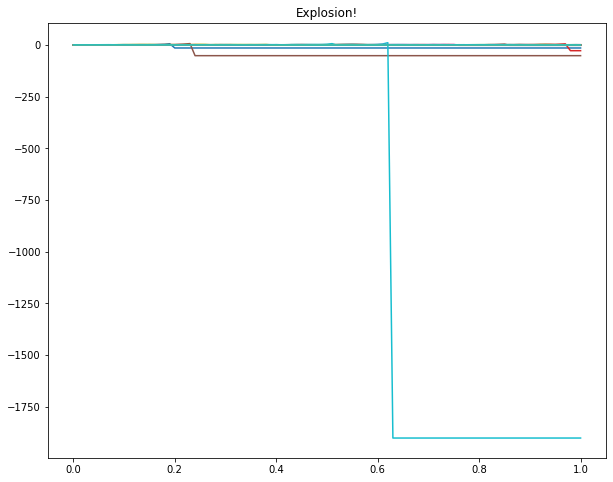

In [23]:
plt.figure(figsize=(10, 8))
time_points = np.arange(0, 1.01, 0.01)
for _ in range(100):
    plt.plot(time_points, explosion_process(1, 0.01))
plt.title("Explosion!")
plt.show()

Some paths significantly dominate the whole paths: the accumulation of local explosion is really terrible!

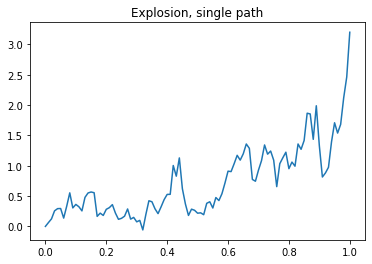

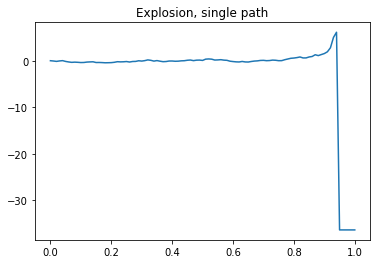

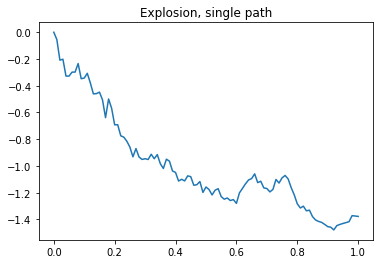

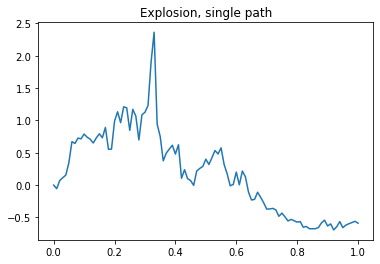

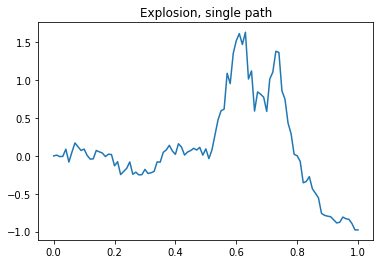

In [18]:
time_points = np.arange(0, 1.01, 0.01)
for _ in range(5):
    plt.plot(time_points, explosion_process(1, 0.01))
    plt.title("Explosion, single path")
    plt.show()

- The variations of different paths are so huge! They hardly perform in the same way, even though they come from the same SDE.
- For the crazy paths: once they hit a very negative number, they will stay flat since the scale of movements are nearly zero. If some hit very large values, then the explosion will be magnified significantly-- everything runs out of control! (They will cause warnings in the plots, as their values trigger some overflow problems)